# Project1

## Step 1
Dependencies and Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from scipy.stats import linregress

# from api_keys import geoapify_key

In [2]:
# Load the CSV file
df=pd.read_csv("./Resources/Kaggle/Student Loan Debt by School 2020-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42740 entries, 0 to 42739
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  42740 non-null  int64  
 1   OPE ID                 42740 non-null  int64  
 2   School                 42740 non-null  object 
 3   City                   33650 non-null  object 
 4   State                  40700 non-null  object 
 5   Zip Code               33650 non-null  float64
 6   School Type            42740 non-null  object 
 7   Loan Type              42740 non-null  object 
 8   Recipients             42740 non-null  float64
 9   # of Loans Originated  42740 non-null  float64
 10  $ of Loans Originated  42740 non-null  float64
 11  # of Disbursements     42740 non-null  float64
 12  $ of Disbursements     42740 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 4.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42740 entries, 0 to 42739
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  42740 non-null  int64  
 1   OPE ID                 42740 non-null  int64  
 2   School                 42740 non-null  object 
 3   City                   33650 non-null  object 
 4   State                  40700 non-null  object 
 5   Zip Code               42740 non-null  object 
 6   School Type            42740 non-null  object 
 7   Loan Type              42740 non-null  object 
 8   Recipients             42740 non-null  int64  
 9   # of Loans Originated  42740 non-null  int64  
 10  $ of Loans Originated  42740 non-null  float64
 11  # of Disbursements     42740 non-null  int64  
 12  $ of Disbursements     42740 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 4.2+ MB
State
AK      6
AL     57
AR     66
AZ     64
CA 

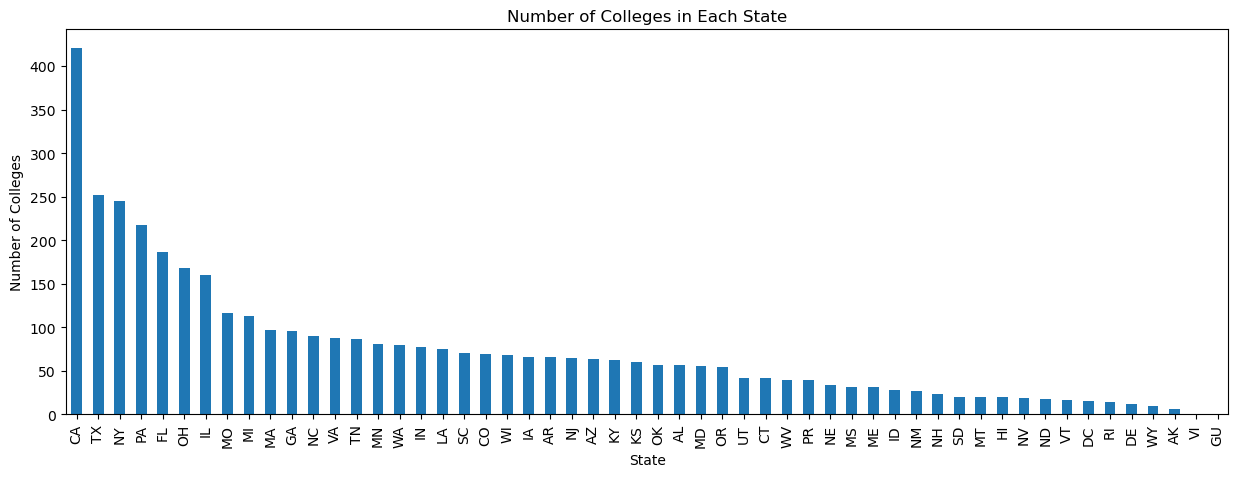

In [9]:
#Change data type and rename columns
df['Zip Code'] = df['Zip Code'].fillna(-1).astype(int).astype(str).replace('-1', 'NaN')
df['Recipients'] = df['Recipients'].astype(int)
df['# of Loans Originated'] = df['# of Loans Originated'].astype(int)
df['# of Disbursements'] = df['# of Disbursements'].astype(int)
df.info()

#Show the number of colleges in each state:
#print(df.groupby('State').count()['School'].unique())
unique_schools_per_state = df.groupby('State')['School'].nunique()
print(unique_schools_per_state)

# Plotting
unique_schools_per_state.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.title("Number of Colleges in Each State")
plt.xlabel("State")
plt.ylabel("Number of Colleges")
plt.show()

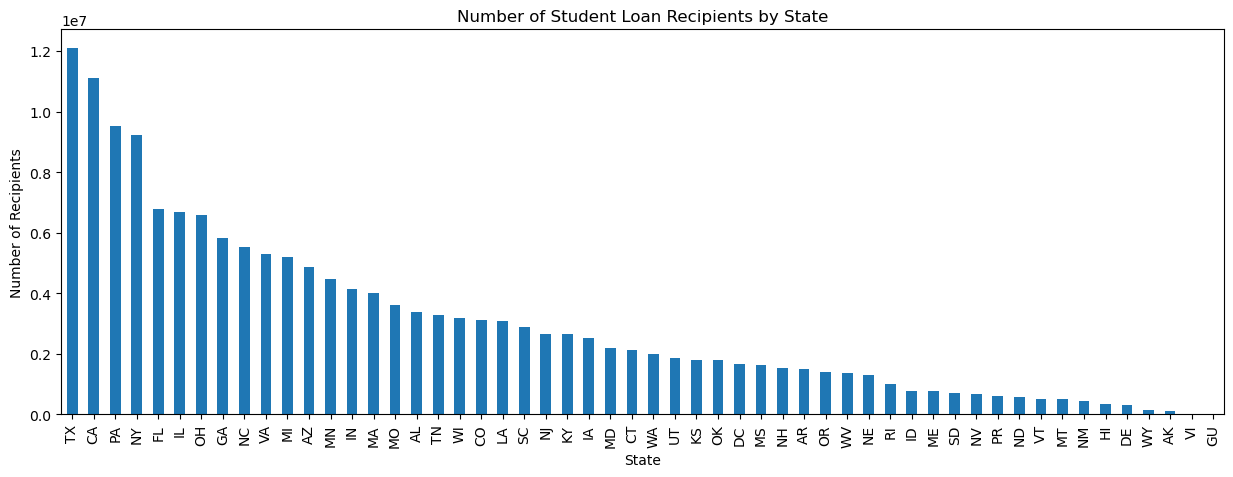

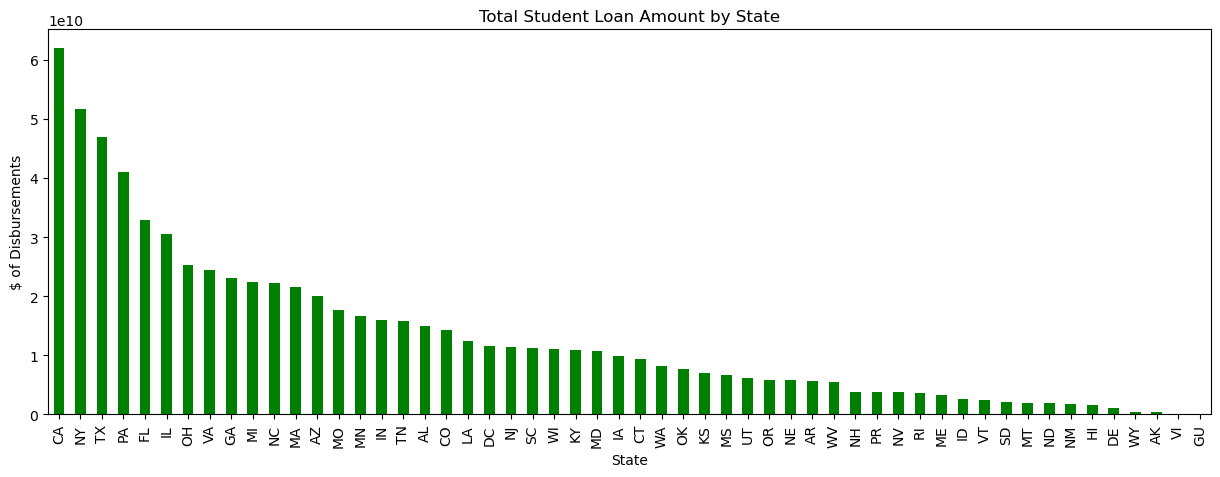

In [13]:
df.head(10)

# Grouping by State for Recipients and Loan Amount
grouped_by_state = df.groupby('State').agg({'Recipients': 'sum', '$ of Disbursements': 'sum'})

# Plotting Quantity of Recipients
grouped_by_state['Recipients'].sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.title("Number of Student Loan Recipients by State")
plt.xlabel("State")
plt.ylabel("Number of Recipients")
plt.show()

# Plotting Loan Amount
grouped_by_state['$ of Disbursements'].sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color='green')
plt.title("Total Student Loan Amount by State")
plt.xlabel("State")
plt.ylabel("$ of Disbursements")
plt.show()

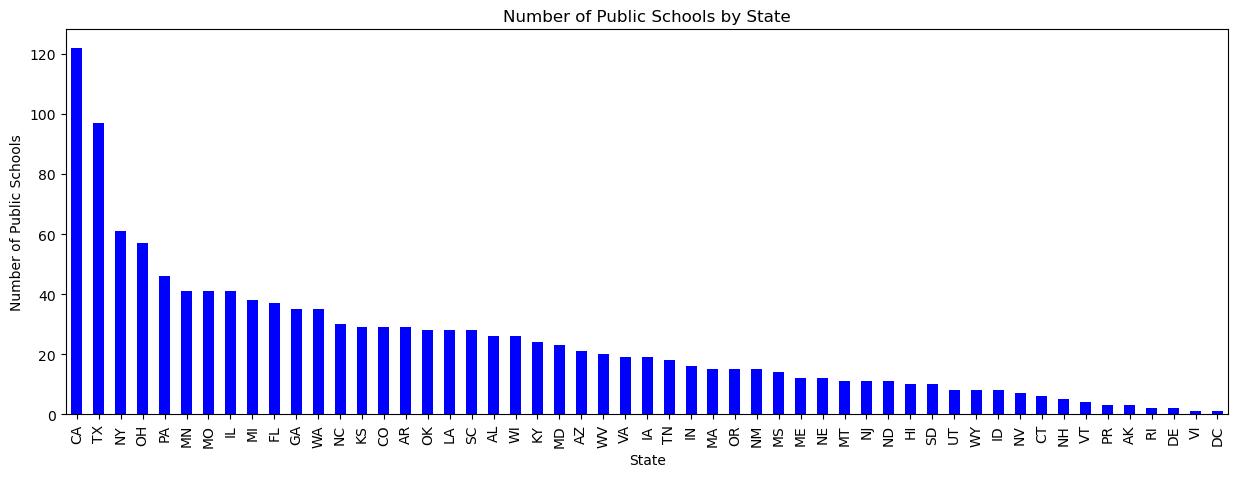

IndexError: index 0 is out of bounds for axis 0 with size 0

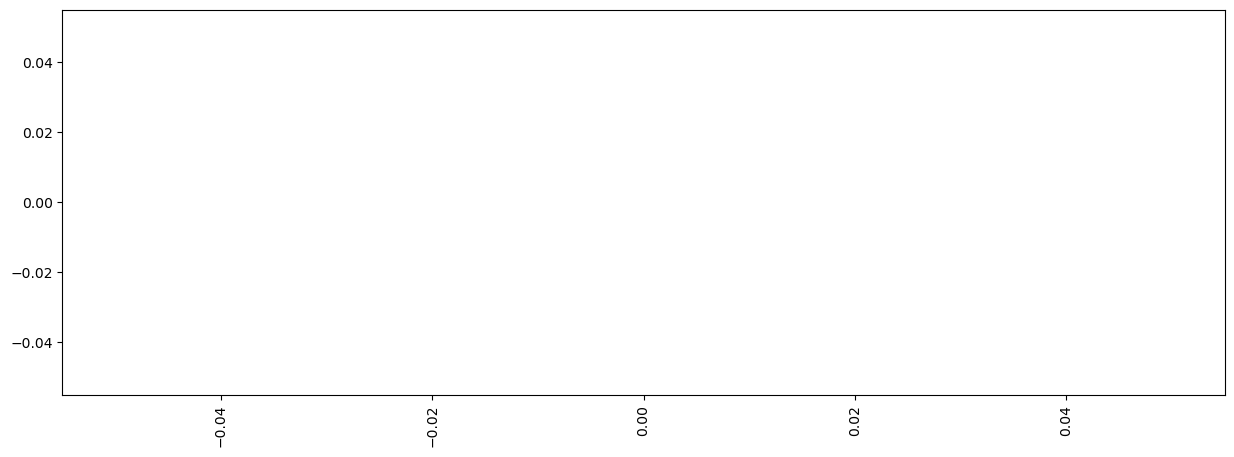

In [14]:
df.describe()

# Public Schools by State
public_schools = df[df['School Type'] == 'Public'].groupby('State')['School'].nunique()
public_schools.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color='blue')
plt.title("Number of Public Schools by State")
plt.xlabel("State")
plt.ylabel("Number of Public Schools")
plt.show()

# Private Schools by State
private_schools = df[df['School Type'] == 'Private'].groupby('State')['School'].nunique()
private_schools.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color='red')
plt.title("Number of Private Schools by State")
plt.xlabel("State")
plt.ylabel("Number of Private Schools")
plt.show()

# States with Most Recipients of Student Loans
most_recipients = df.groupby('State')['Recipients'].sum()
most_recipients.sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), color='purple')
plt.title("States with the Most Recipients of Student Loans")
plt.xlabel("State")
plt.ylabel("Number of Recipients")
plt.show()

## Step 2
### Ask the questions

State, What is the breakdown of number of colleges in each state? P

State, What is the breakdown of recipients of Student Loans by State (by quantity and by $)?P

State, What states have the most (public schools? Private schools?) recipients?P

State, What are the top 10 states with the most student loans?L

Geographic, How does the average student loan vary by zip code?M

Geographic, Are there trends based on geographic region or type of school?T

Loan Type, What is the breakdown of type of student loan  (subsidized, unsubsidized, grad plus, parent plus, etc.)?M

School Type, What is the breakdown of student loan quantity/$ by school type (for profit, non-profit, public, etc.)?L

<!-- VS, What is the breakdown in disbursements versus loan origination $ amounts? -->

<!-- VS, Which schools have the highest disparity between loans originated and loans disbursed? -->

API, Foreign university, VS US

More datasets